## Step 1: Load Articles into a DataFrame

In this step, we will load all published articles associated with our Dev.to account into a Pandas DataFrame. This data will allow us to examine the article titles and publication dates.

The `load_articles_to_dataframe` function fetches articles from the Dev.to API, handles pagination, and organizes the results in a DataFrame for easy analysis.


In [137]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

import src.api_client as api_client


In [138]:
# Check if the articles file exists
if os.path.exists("articles.parquet"):
    # Load articles from the existing Parquet file
    articles_df = pd.read_parquet("articles.parquet")
    print("Loaded articles from articles.parquet")
else:
    # Fetch articles and save to Parquet file
    articles_df = api_client.load_articles_to_dataframe()
    articles_df.to_parquet("articles.parquet", compression='gzip')
    print("Fetched articles from API and saved to articles.parquet")

articles_df.head(10)

Loaded articles from articles.parquet


,title,created_at,public_reactions_count
0,12 Steps to Organize and Maintain Your Python ...,2024-10-30T16:16:25.202Z,6
1,Data Analytics Dashboard Starter Kit with Neon...,2024-08-31T11:22:21.164Z,23
2,Binary Tree,2024-06-16T10:24:55.823Z,9
3,My Journey Learning AI for Songwriting: LSTMs ...,2024-02-19T13:47:52.939Z,17
4,The Data Engineering Docker-Compose Starter Kit,2023-09-22T09:38:28.956Z,13
5,The Golang Saga: A Coder’s Journey There and B...,2023-08-16T17:06:20.082Z,7
6,The Golang Saga: A Coder’s Journey There and B...,2023-07-27T16:19:13.884Z,7
7,The Golang Saga: A Coder’s Journey There and B...,2023-07-04T19:27:11.200Z,22
8,Unleash Your Pipeline Creativity: Local Develo...,2023-05-03T07:52:12.468Z,5
9,From Kafka to Amazon S3: Partitioning Outputs,2023-04-09T16:03:41.325Z,7


## Step 2: Load Followers into a DataFrame

Next, we’ll load the details of all followers into a Pandas DataFrame. This data provides insights into each follower’s profile, which we can later analyze to assess follower engagement and activity levels.

The `load_followers_to_dataframe` function collects data on each follower, including profile information.


In [139]:
# Check if the followers file exists
if os.path.exists("followers.parquet"):
    # Load followers from the existing Parquet file
    followers_df = pd.read_parquet("followers.parquet")
    print("Loaded followers from followers.parquet")
else:
    # Fetch followers and save to Parquet file
    followers_df = api_client.load_extended_followers_to_dataframe()
    followers_df.to_parquet("followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to followers.parquet")

followers_df.head(10)

Loaded followers from followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,summary,location,website_url,joined_at
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,Development,None,None,"Oct 31, 2024"
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Aug 31, 2024"


In [140]:
print(f"You have {len(articles_df)} articles and {len(followers_df)} followers.")

You have 11 articles and 2485 followers.


## Step 3: Enrich Followers Data with Article Information

In this step, we expand our analysis by adding article information for each follower. Using the `update_followers_with_articles` function, we retrieve:

- The total number of articles each follower has published (`article_count`).
- A list of article titles for each follower (`article_titles`).
- A unique list of tags across all articles by each follower (`unique_tags`).

This enriched data will allow us to better understand follower engagement and interests based on their content.

In [141]:
if os.path.exists("extended_followers.parquet"):
    # Load followers from the existing Parquet file
    extended_followers_df = pd.read_parquet("extended_followers.parquet")
    print("Loaded followers from extended_followers.parquet")
else:
    # Enrich followers with article information
    extended_followers_df = api_client.update_followers_with_articles(followers_df)
    extended_followers_df.to_parquet("extended_followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to extended_followers.parquet")

extended_followers_df.head(10)

Loaded followers from extended_followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,summary,location,website_url,joined_at,article_count,article_titles,unique_tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,Development,None,None,"Oct 31, 2024",0,[],[],[],[],[]
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Aug 31, 2024",0,[],[],[],[],[]


## Step 4: Enrich Followers Data with Profile Data from Dev.to

In this step, we enhance our follower dataset by including additional profile data scraped from Dev.to:

- **Badges**: List of badges each follower has earned.
- **Comments Count**: Total number of comments written by each follower.
- **Tags Followed**: Number of tags each follower is following.

In [142]:
if os.path.exists("extended_scrapped_followers.parquet"):
    extended_scrapped_followers_df = pd.read_parquet("extended_scrapped_followers.parquet")
    print("Loaded followers from extended_followers.parquet")
else:
    extended_scrapped_followers_df = api_client.update_followers_with_stats(extended_followers_df)
    extended_scrapped_followers_df.to_parquet("extended_scrapped_followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to extended_followers.parquet")

extended_scrapped_followers_df.head(10)

Loaded followers from extended_followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,...,article_count,article_titles,unique_tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts,badges,badge_descriptions,comments_count,tags_count
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,...,0,[],[],[],[],[],[],[],0,0
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,2
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,3
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,2
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,2


## Analysis

Now that we have all the data, let's dive into the analysis.

This chart shows how many new followers joined each day and the total follower count over time. The vertical lines mark the dates articles were published, so we can see if any spikes in followers line up with those dates.

As you can see, there is a big jump in new followers around 2024-03. Outside of that spike, follower growth has been more steady, with smaller increases on some days. The article publication lines help us see if posting new articles tends to bring in more followers.

However, from this chart, it's not entirely clear which specific article caused the big spike. To get a closer look, we’ll use Plotly to create a more detailed, interactive graph that will help us identify which article might have driven this increase in followers.

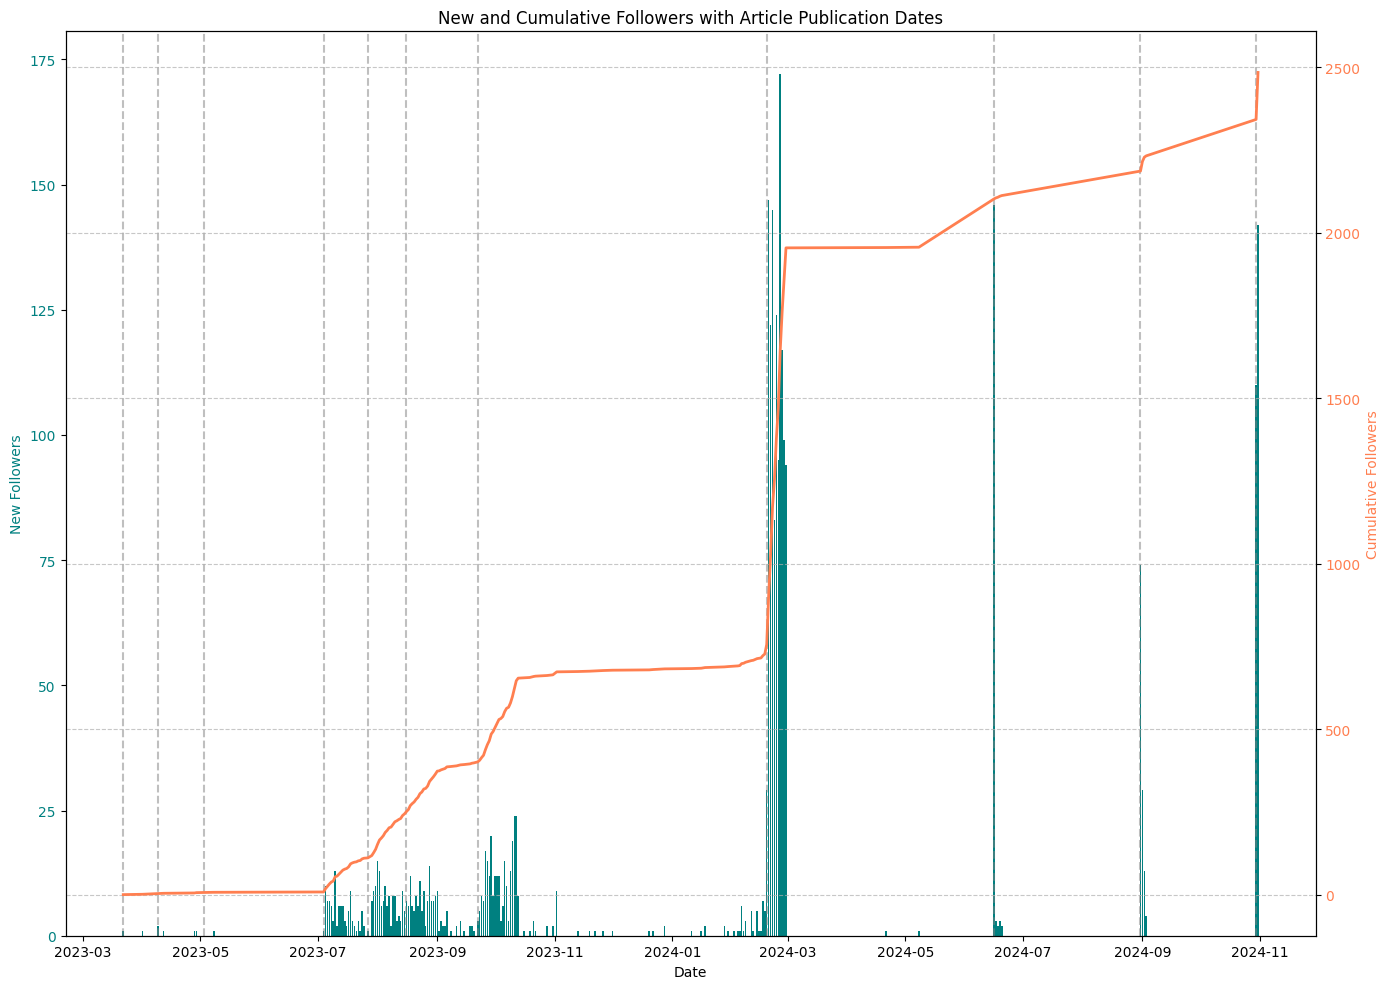

In [143]:
articles_df_copy = articles_df.copy()
followers_df_copy = extended_scrapped_followers_df.copy()

articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at']).dt.date
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at']).dt.date

daily_follower_count = followers_df_copy['created_at'].value_counts().sort_index()
cumulative_followers = daily_follower_count.cumsum()

fig, ax1 = plt.subplots(figsize=(14, 10))

ax1.bar(daily_follower_count.index, daily_follower_count.values, color='teal', label='New Followers')
ax1.set_xlabel("Date")
ax1.set_ylabel("New Followers", color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

ax2 = ax1.twinx()
ax2.plot(cumulative_followers.index, cumulative_followers.values, color='#FF7F50', linewidth=2, label='Cumulative Followers')
ax2.set_ylabel("Cumulative Followers", color='#FF7F50')
ax2.tick_params(axis='y', labelcolor='#FF7F50')

for article_date in articles_df_copy['created_at']:
    ax1.axvline(x=article_date, color='gray', linestyle='--', alpha=0.5)

plt.title("New and Cumulative Followers with Article Publication Dates")
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


This updated chart still shows the daily new followers (in green bars) and cumulative followers (in a coral line), but now we can hover over points to see exact values. The dashed lines represent article publication dates, and hovering over these lines displays the article titles and publication dates. 

Note: Plotly charts are interactive, but they may not display directly in the GitHub UI. To view this chart, you’ll need to open the notebook in a Jupyter environment that supports Plotly (e.g., Jupyter Notebook, JupyterLab, or Visual Studio Code).

In [144]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=daily_follower_count.index,
    y=daily_follower_count.values,
    name='New Followers',
    marker_color='teal',
    marker_line_color='teal',  
    marker_line_width=1,  
    hovertemplate='Date: %{x}<br>New Followers: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=cumulative_followers.index,
    y=cumulative_followers.values,
    mode='lines',
    name='Cumulative Followers',
    line=dict(color='#FF7F50', width=3), 
    yaxis="y2",
    hovertemplate='Date: %{x}<br>Cumulative Followers: %{y}<extra></extra>'
))

for _, row in articles_df_copy.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['created_at'], row['created_at']],
        y=[0, cumulative_followers.max()],
        mode='lines',
        line=dict(color='gray', dash='dash'),
        hoverinfo='text',
        text=f"Article Date: {row['created_at']}<br>Title: {row['title']}",
        showlegend=False
    ))

fig.update_layout(
    title="New and Cumulative Followers with Article Publication Dates",
    xaxis_title="Date",
    yaxis=dict(title="New Followers", side='left', range=[0, daily_follower_count.max() * 1.2]),
    yaxis2=dict(title="Cumulative Followers", overlaying='y', side='right', range=[0, cumulative_followers.max() * 1.1]),
    width=1000, 
    height=800,   
    legend=dict(x=0.01, y=0.99),
    hovermode="x unified",
    bargap=0.2,  
    plot_bgcolor='white'  
)

fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()


After looking at the overall trends in followers, let’s dig a little deeper. Now we want to find out if our articles are bringing in people who are new to Dev.to.

In this part of the analysis, we’re looking at:
- How many followers were already on Dev.to versus those who joined on the same day they followed us.
- Whether specific articles might have encouraged people to join Dev.to just to follow us.

On the right, the pie chart shows the overall split: followers who joined Dev.to on the same day they followed us versus those who were already members. On the left, the bar chart breaks down new followers by article, highlighting same-day joiners.

**Note:** In the follower data, `created_at` refers to the date they started following me, while `joined_at` indicates when they originally joined Dev.to.

Here’s what we see:

1. **Follower Join Dates (Pie Chart)**:
   - Most followers (98.5%) joined Dev.to on the same day they followed us. This could mean that our articles are reaching people outside the Dev.to community and encouraging them to join.

2. **New Followers on Article Days (Bar Chart)**:
   - Across most articles, the majority of followers are same-day joiners. 
   
**This pattern seems a bit suspicious—98.5% joining the same day could indicate unusual behavior. Let’s take a closer look at the quality of our followers to understand more about them.**


   

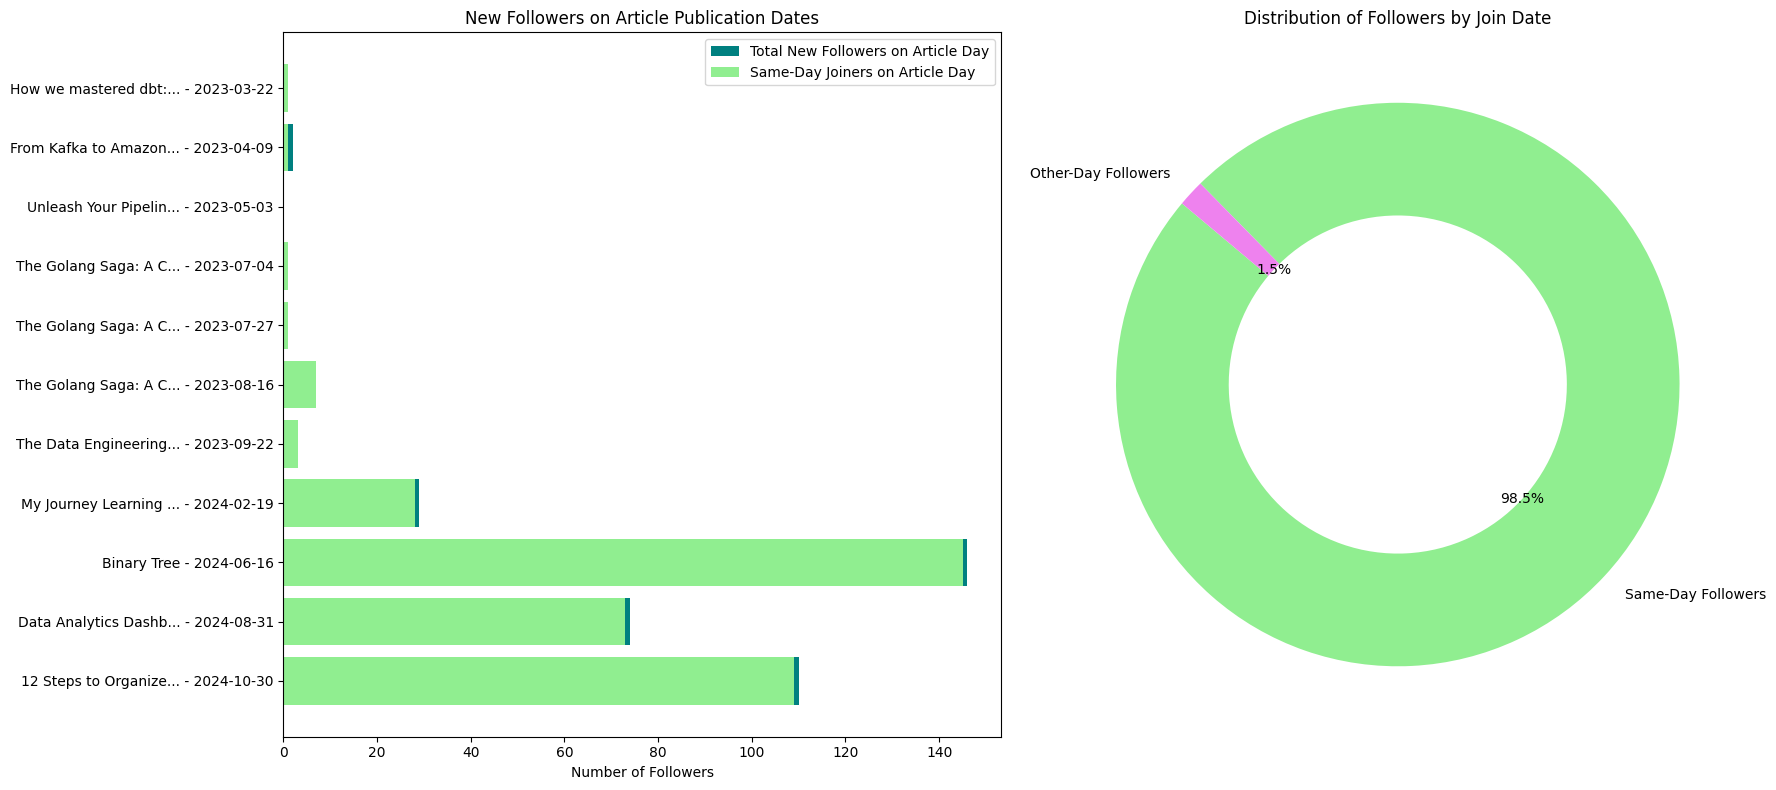

In [145]:
articles_df_copy = articles_df.copy()
followers_df_copy = extended_scrapped_followers_df.copy()

articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at']).dt.date
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at']).dt.date
followers_df_copy['joined_at'] = pd.to_datetime(followers_df_copy['joined_at']).dt.date

total_followers = followers_df_copy.shape[0]
same_day_joiners = followers_df_copy[followers_df_copy['created_at'] == followers_df_copy['joined_at']].shape[0]
other_day_joiners = total_followers - same_day_joiners

donut_labels = ["Same-Day Followers", "Other-Day Followers"]
donut_sizes = [same_day_joiners, other_day_joiners]
donut_colors = ["lightgreen", "violet"]

def shorten_title(title, max_length=20):
    return title if len(title) <= max_length else title[:max_length] + "..."

article_dates = articles_df_copy['created_at'].unique()
total_followers_per_article = []
same_day_joiners_per_article = []
article_labels = [
    f"{shorten_title(title)} - {date}" 
    for title, date in zip(articles_df_copy['title'], articles_df_copy['created_at'])
]

for date in article_dates:
    # Total followers on the article creation date
    total_followers = followers_df_copy[followers_df_copy['created_at'] == date].shape[0]
    total_followers_per_article.append(total_followers)
    
    # Followers who joined on the same day as the article creation date
    same_day_joiners = followers_df_copy[
        (followers_df_copy['created_at'] == date) &
        (followers_df_copy['created_at'] == followers_df_copy['joined_at'])
    ].shape[0]
    same_day_joiners_per_article.append(same_day_joiners)

total_followers_per_article = np.array(total_followers_per_article)
same_day_joiners_per_article = np.array(same_day_joiners_per_article)
y_positions = np.arange(len(article_labels))

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(18, 8))

ax1.pie(donut_sizes, labels=donut_labels, colors=donut_colors, autopct='%1.1f%%', 
        startangle=140, wedgeprops=dict(width=0.4))
ax1.set_title("Distribution of Followers by Join Date")

ax2.barh(y_positions, total_followers_per_article, color='teal', label='Total New Followers on Article Day')
ax2.barh(y_positions, same_day_joiners_per_article, color='lightgreen', label='Same-Day Joiners on Article Day')

ax2.set_yticks(y_positions)
ax2.set_yticklabels(article_labels)
ax2.set_xlabel("Number of Followers")
ax2.set_title("New Followers on Article Publication Dates")
ax2.legend()

plt.tight_layout()
plt.show()


This chart shows the distribution of followers based on their tenure on the platform, measured in days:

- **Newer Followers**: The majority of followers have been on Dev.to for less than 500 days, indicating that most are relatively recent members.
- **Long-Time Members**: There are only a few followers who have been on the platform for over 1,000 days.

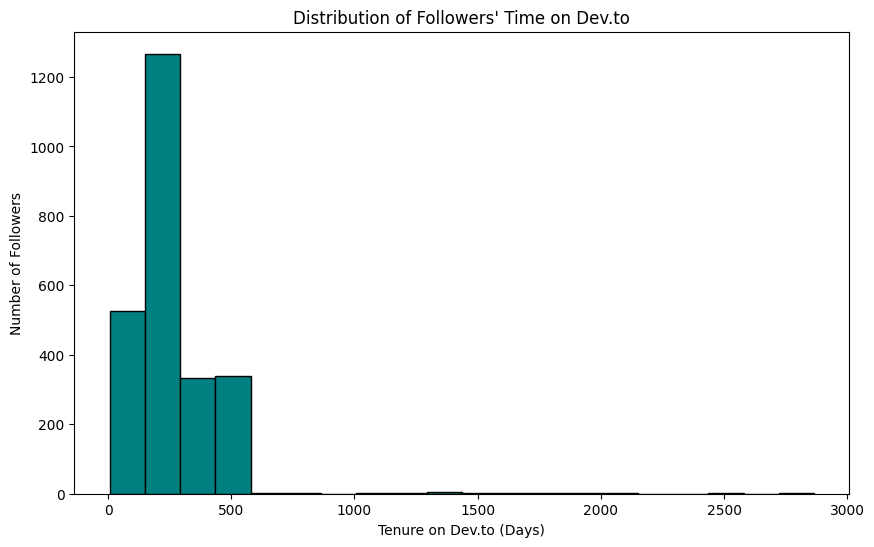

In [146]:
from datetime import datetime
followers_df_age_copy = followers_df_copy.copy()

followers_df_age_copy['joined_at'] = pd.to_datetime(followers_df_age_copy['joined_at'])

today = pd.Timestamp(datetime.now())
followers_df_age_copy['dev_to_tenure_days'] = (today - followers_df_age_copy['joined_at']).dt.days

# Plot a histogram of Dev.to tenure for followers
plt.figure(figsize=(10, 6))
plt.hist(followers_df_age_copy['dev_to_tenure_days'].dropna(), bins=20, edgecolor='black', color='teal')
plt.xlabel("Tenure on Dev.to (Days)")
plt.ylabel("Number of Followers")
plt.title("Distribution of Followers' Time on Dev.to")
plt.show()




To understand the quality of our followers, we analyzed various profile attributes to see how complete or active these profiles are. 

The bar chart shows the number of followers with specific attributes, such as:
- Having written comments or articles
- Having badges, a Twitter/GitHub username, a website, or a location listed
- Having a profile image or a summary
- Following tags on Dev.to

We also checked for "Empty Profiles" — followers who have no activity or profile details. 

Among my 2,485 followers, everyone has a profile image, suggesting that Dev.to likely assigns a default image, so this attribute isn’t meaningful for our analysis. 

Most followers also follow tags, but we don’t have details on which tags they follow, making this less interesting for insights.

Next, we’ll look at how many followers have only one attribute filled out.

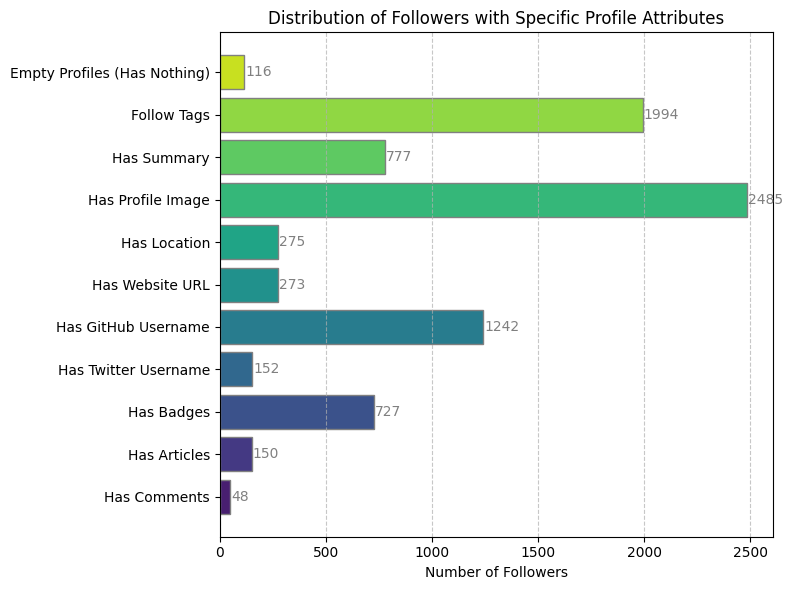

In [147]:
article_dates = articles_df_copy['created_at'].unique()

attribute_counts = {
    "Has Comments": followers_df_copy['comments_count'].gt(0).sum(),
    "Has Articles": followers_df_copy['article_count'].gt(0).sum(),
    "Has Badges": followers_df_copy['badges'].str.len().gt(0).sum(),
    "Has Twitter Username": followers_df_copy['twitter_username'].notna().sum(),
    "Has GitHub Username": followers_df_copy['github_username'].notna().sum(),
    "Has Website URL": followers_df_copy['website_url'].notna().sum(),
    "Has Location": followers_df_copy['location'].notna().sum(),
    "Has Profile Image": followers_df_copy['profile_image'].notna().sum(),
    "Has Summary": followers_df_copy['summary'].notna().sum(),
    "Follow Tags": followers_df_copy['tags_count'].gt(0).sum(),
    "Empty Profiles (Has Nothing)": followers_df_copy[
        ((followers_df_copy['joined_at'].isin(article_dates)) | 
         (~followers_df_copy['joined_at'].isin(article_dates))) &
        (followers_df_copy['comments_count'] == 0) &
        (followers_df_copy['article_count'] == 0) &
        (followers_df_copy['tags_count'] == 0) &
        (followers_df_copy['badges'].str.len() == 0) &
        (followers_df_copy[['twitter_username', 'github_username', 
                            'location', 'website_url', 'summary']]
         .isnull().all(axis=1))
    ].shape[0]
}

labels = list(attribute_counts.keys())
values = list(attribute_counts.values())

palette = sns.color_palette("viridis", len(labels))

plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

plt.xlabel("Number of Followers")
plt.title("Distribution of Followers with Specific Profile Attributes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In this part of the analysis, we’re looking at followers who have only one attribute filled out in their profiles. This can help us understand which minimal profile details are most common among followers who might not be very engaged.

The bar chart shows the number of followers who have each specific attribute as their only profile detail, such as only having a GitHub username, only following tags, or only having a location listed. 


- **Only Follow Tags**: A large group (530 followers) has only the "follow tags" attribute. Since we can’t analyze specific tags they follow, we’ll exclude this group from further analysis.
- **Only Badges**: There are 24 followers who have only badges and no other profile information. This is unusual and might indicate suspicious or inactive profiles. We’ll take a closer look at these followers.


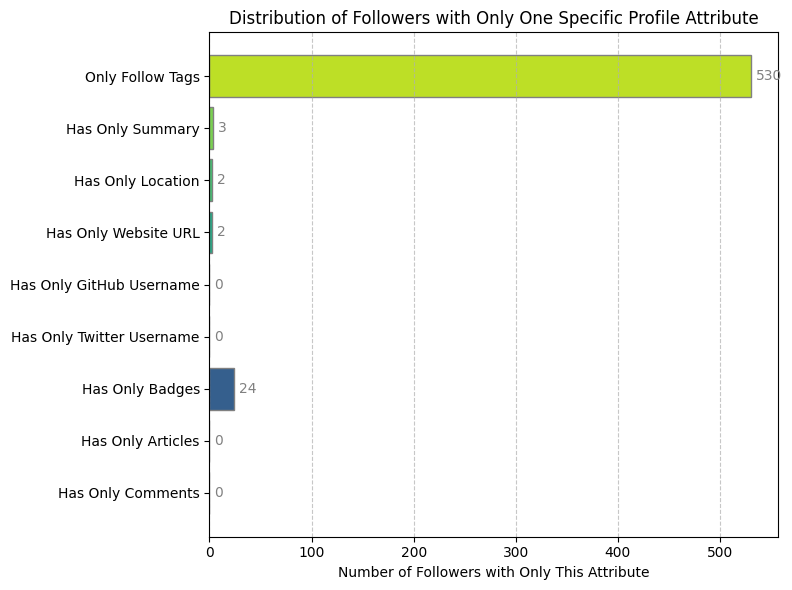

In [148]:
attributes = {
    "Has Only Comments": 'comments_count',
    "Has Only Articles": 'article_count',
    "Has Only Badges": 'badges',
    "Has Only Twitter Username": 'twitter_username',
    "Has Only GitHub Username": 'github_username',
    "Has Only Website URL": 'website_url',
    "Has Only Location": 'location',
    "Has Only Summary": 'summary',
    "Only Follow Tags": 'tags_count'
}

only_attribute_counts = {}
for label, column in attributes.items():
    if column == 'badges':
        # For 'badges', check if list length is > 0 and other fields are empty
        only_attribute_counts[label] = followers_df_copy[
            (followers_df_copy['badges'].str.len() > 0) &
            (followers_df_copy['comments_count'] == 0) &
            (followers_df_copy['article_count'] == 0) &
            (followers_df_copy['tags_count'] == 0) &
            (followers_df_copy[['twitter_username', 'github_username', 'location', 
                                             'website_url', 'summary']].isnull().all(axis=1))
        ].shape[0]
    elif column == 'tags_count':
        # For 'tags_count', check if > 0 and other fields are empty
        only_attribute_counts[label] = followers_df_copy[
            (followers_df_copy['tags_count'] > 0) &
            (followers_df_copy['comments_count'] == 0) &
            (followers_df_copy['article_count'] == 0) &
            (followers_df_copy['badges'].str.len() == 0) &
            (followers_df_copy[['twitter_username', 'github_username', 'location', 
                                             'website_url', 'summary']].isnull().all(axis=1))
        ].shape[0]
    else:
        # For other fields, check if the field is not null or > 0 and others are empty
        only_attribute_counts[label] = followers_df_copy[
            (followers_df_copy[column].notna() if followers_df_copy[column].dtype == 'O' 
             else followers_df_copy[column] > 0) &
            (followers_df_copy['comments_count'] == 0) &
            (followers_df_copy['article_count'] == 0) &
            (followers_df_copy['tags_count'] == 0) &
            (followers_df_copy['badges'].str.len() == 0) &
            (followers_df_copy[['twitter_username', 'github_username', 'location', 
                                             'website_url', 'summary']].apply(lambda x: x.isnull() | (x == ''), axis=1).all(axis=1))
        ].shape[0]

labels = list(only_attribute_counts.keys())
values = list(only_attribute_counts.values())

palette = sns.color_palette("viridis", len(labels))

plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

plt.xlabel("Number of Followers with Only This Attribute")
plt.title("Distribution of Followers with Only One Specific Profile Attribute")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


We filtered out the followers who have only the "badges" attribute with no other profile details. After reviewing, we found that all 24 of these followers have the **"One Year Club"** badge, which simply indicates they’ve been on Dev.to for a year. This badge doesn’t reflect any active engagement, like posting articles or comments.

Since this badge alone doesn’t tell us much about these followers' activity, we’ll move on to analyze the breakdown of tags among followers to see if it provides more insights.

In [149]:
# Filter followers who have only badges and no other profile attributes filled
only_badges = followers_df_copy[
    (followers_df_copy['badges'].str.len() > 0) &  # Has badges
    (followers_df_copy['comments_count'] == 0) &  # No comments
    (followers_df_copy['article_count'] == 0) &  # No articles
    (followers_df_copy['tags_count'] == 0) &  # No tags
    (followers_df_copy['twitter_username'].isnull()) &  # No Twitter username
    (followers_df_copy['github_username'].isnull()) &  # No GitHub username
    (followers_df_copy['location'].isnull()) &  # No location
    (followers_df_copy['website_url'].isnull()) &  # No website URL
    (followers_df_copy['summary'].isnull())  # No summary
]

distinct_badges = only_badges['badges'].explode().unique()

distinct_badges

array(['One Year Club'], dtype=object)

This chart shows the top 10 most common badges among followers. Here’s what stands out:

- **"One Year Club"** is by far the most common badge, along with other similar "X Year Club" badges. These badges are awarded simply for being on the platform for a certain amount of time and don’t indicate any active engagement.
  
Since these "X Year Club" badges don’t provide useful insights into follower activity, I’ll remove followers with only these passive badges from further analysis to focus on those who are more actively engaged.


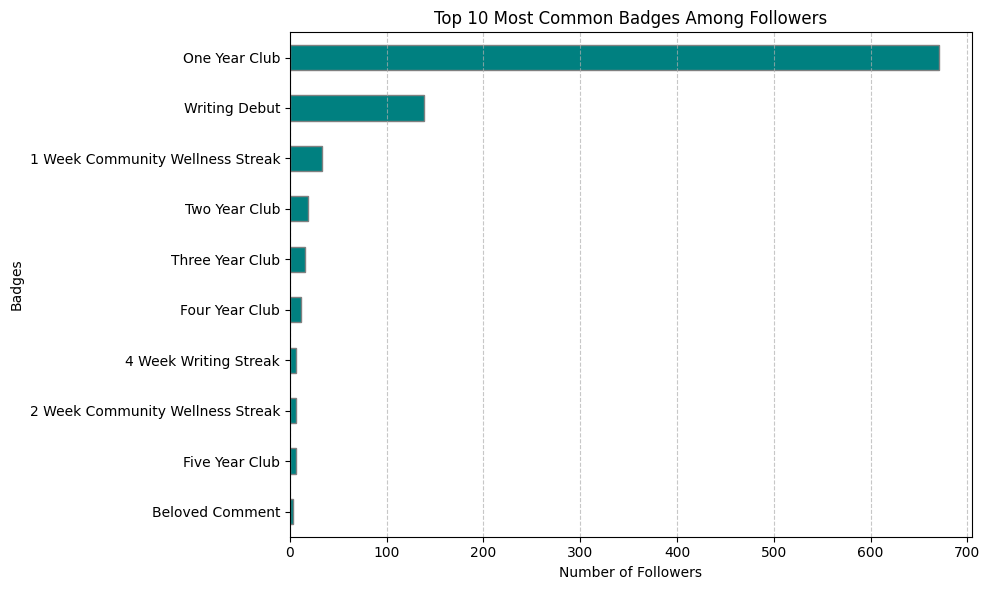

In [150]:
top_badge_counts = followers_df_copy['badges'].explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
top_badge_counts.plot(kind='barh', color='teal', edgecolor='gray')
plt.xlabel("Number of Followers")
plt.ylabel("Badges")
plt.title("Top 10 Most Common Badges Among Followers")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


Now that we've filtered out passive "Year Club" badges, we’re left with badges that reflect active engagement on the site.

In this chart, we see the top 10 most common active badges among followers. These badges represent achievements that involve active participation, such as:
- **Writing Debut**: Awarded for publishing the first article.
- **Community Wellness Streaks**: Recognizing consistent engagement, like a 1-week or 4-week streak of activity.
- **Other Achievements**: Badges like "Beloved Comment" and "Hacktoberfest Pledge" reflect contributions through comments or participation in events.

This view gives us a clearer picture of followers who are actively contributing on Dev.to, rather than just being passive members.


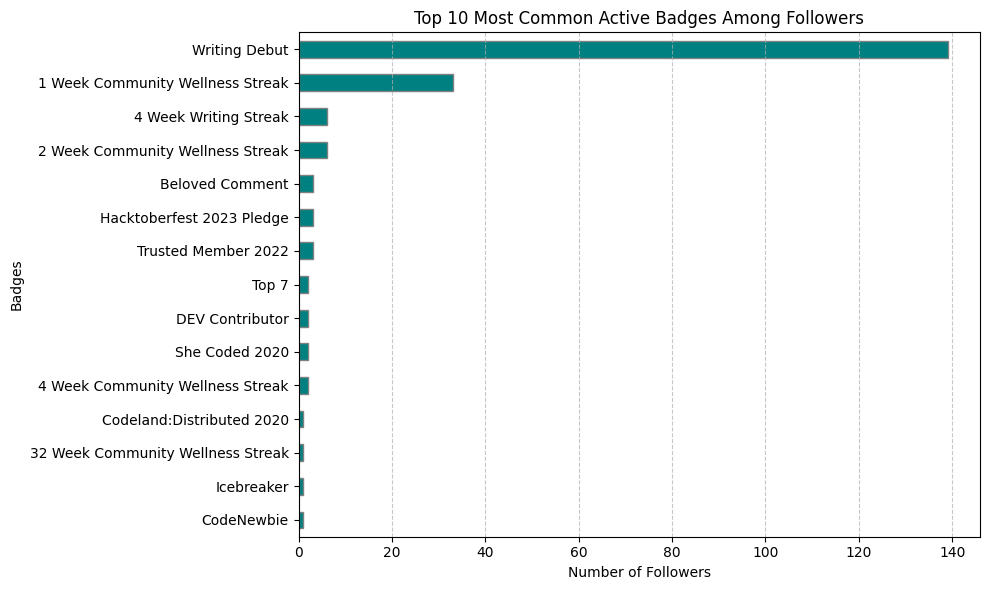

In [151]:
all_badge_counts = followers_df_copy['badges'].explode().value_counts()

# Remove badges that contain "Year Club"
filtered_badge_counts = all_badge_counts[~all_badge_counts.index.str.contains("Year Club")].head(15)

plt.figure(figsize=(10, 6))
filtered_badge_counts.plot(kind='barh', color='teal', edgecolor='gray')
plt.xlabel("Number of Followers")
plt.ylabel("Badges")
plt.title("Top 10 Most Common Active Badges Among Followers")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


The next chart shows the distribution of followers based on their external links, such as Twitter, GitHub, or a personal website:

- **Only GitHub**: The majority of followers with an external profile link have only their GitHub profile listed (1,100 followers). This suggests that many followers are likely developers or involved in tech-related fields.
- **Only Website** and **Only Twitter**: A smaller number of followers have only a personal website (107) or only a Twitter profile (82), indicating less reliance on social platforms or personal branding.
- **Multiple Platforms**: Some followers list multiple platforms, with combinations like "GitHub + Website" (106) and "Twitter + GitHub + Website" (26) being less common.


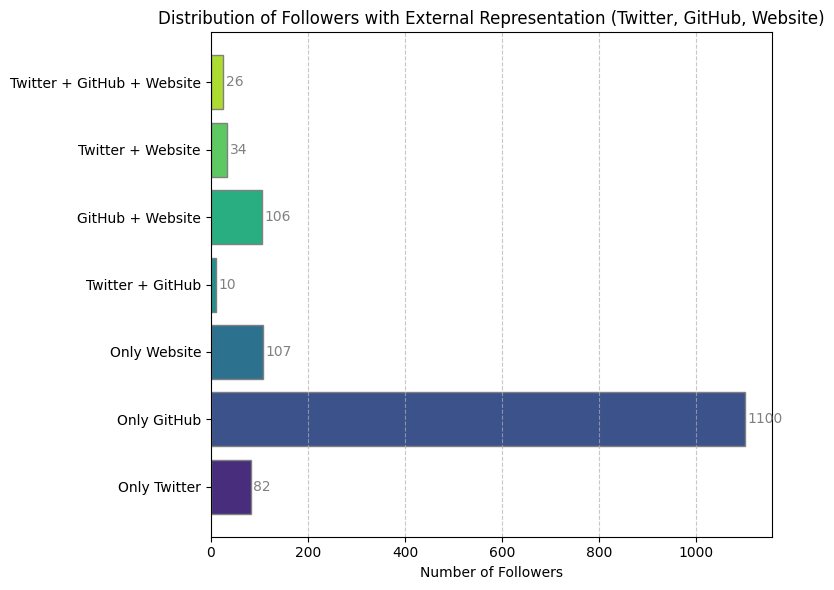

In [152]:
external_representation_counts = {
    "Only Twitter": followers_df_copy[
        (followers_df_copy['twitter_username'].notna()) &
        (followers_df_copy['github_username'].isnull()) &
        (followers_df_copy['website_url'].isnull())
    ].shape[0],
    
    "Only GitHub": followers_df_copy[
        (followers_df_copy['twitter_username'].isnull()) &
        (followers_df_copy['github_username'].notna()) &
        (followers_df_copy['website_url'].isnull())
    ].shape[0],
    
    "Only Website": followers_df_copy[
        (followers_df_copy['twitter_username'].isnull()) &
        (followers_df_copy['github_username'].isnull()) &
        (followers_df_copy['website_url'].notna())
    ].shape[0],
    
    "Twitter + GitHub": followers_df_copy[
        (followers_df_copy['twitter_username'].notna()) &
        (followers_df_copy['github_username'].notna()) &
        (followers_df_copy['website_url'].isnull())
    ].shape[0],
    
    "GitHub + Website": followers_df_copy[
        (followers_df_copy['twitter_username'].isnull()) &
        (followers_df_copy['github_username'].notna()) &
        (followers_df_copy['website_url'].notna())
    ].shape[0],
    
    "Twitter + Website": followers_df_copy[
        (followers_df_copy['twitter_username'].notna()) &
        (followers_df_copy['github_username'].isnull()) &
        (followers_df_copy['website_url'].notna())
    ].shape[0],
    
    "Twitter + GitHub + Website": followers_df_copy[
        (followers_df_copy['twitter_username'].notna()) &
        (followers_df_copy['github_username'].notna()) &
        (followers_df_copy['website_url'].notna())
    ].shape[0]
}

labels = list(external_representation_counts.keys())
values = list(external_representation_counts.values())

palette = sns.color_palette("viridis", len(labels))

plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

plt.xlabel("Number of Followers")
plt.title("Distribution of Followers with External Representation (Twitter, GitHub, Website)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


The next chart shows the distribution of followers based on their internal activity on Dev.to, including badges, comments, and articles:

- **Badges + Articles**: The largest group (120 followers) consists of those with both badges and articles, indicating users who have contributed content and achieved recognition.
- **Badges + Comments + Articles**: A smaller group (20 followers) has engaged in all three activities, showing well-rounded participation on the platform.
- **Only Comments or Only Articles**: There are relatively few followers with only comments (12) or only articles (9), suggesting that most engaged followers tend to have a mix of activities.


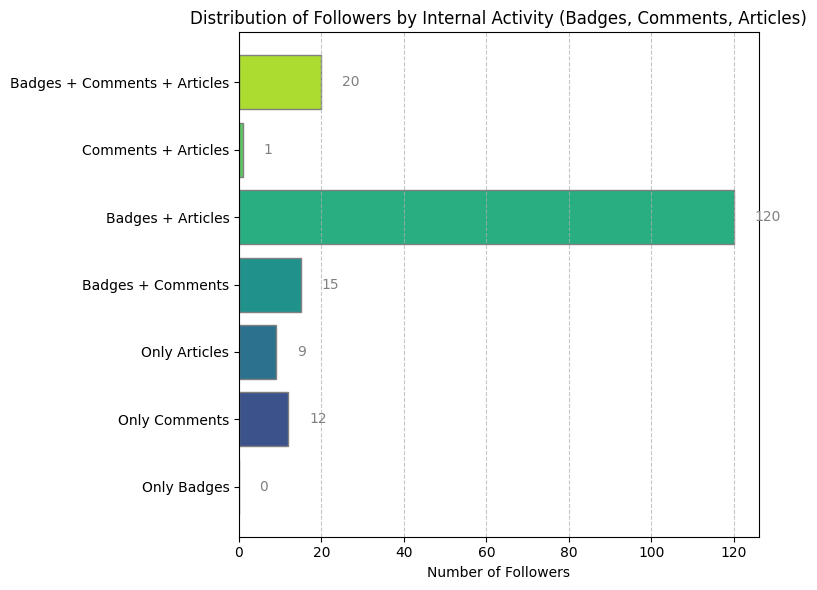

In [153]:
filtered_followers_df = extended_scrapped_followers_df.copy()

# Function to filter out 'Year Club' items
def remove_year_club(budges_list):
    return [badge for badge in budges_list if not badge.endswith("Year Club")]

# Apply the function to the 'budges' column
filtered_followers_df['badges'] = filtered_followers_df['badges'].apply(remove_year_club)

internal_activity_counts = {
    "Only Badges": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] == 0) &
        (filtered_followers_df['tags_count'] == 0) &
        (filtered_followers_df[['twitter_username', 'github_username', 'location', 
                                'website_url', 'summary']].isnull().all(axis=1))
    ].shape[0],
    
    "Only Comments": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] == 0)
    ].shape[0],
    
    "Only Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Badges + Comments": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] == 0)
    ].shape[0],
    
    "Badges + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Comments + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Badges + Comments + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0]
}

labels = list(internal_activity_counts.keys())
values = list(internal_activity_counts.values())

palette = sns.color_palette("viridis", len(labels))

plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

plt.xlabel("Number of Followers")
plt.title("Distribution of Followers by Internal Activity (Badges, Comments, Articles)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


### Top 10 Locations of Followers (Excluding Empty)

This chart shows the top 10 reported locations of followers:

- **India** has the highest number of followers (8), followed by the **USA** (4) and **Brazil** (3).
- Other locations include a mix of cities and countries, like **New Delhi, India**, **Paris, France**, and **Ho Chi Minh**.

This distribution provides insight into the geographic diversity of followers, with the majority concentrated in specific regions.

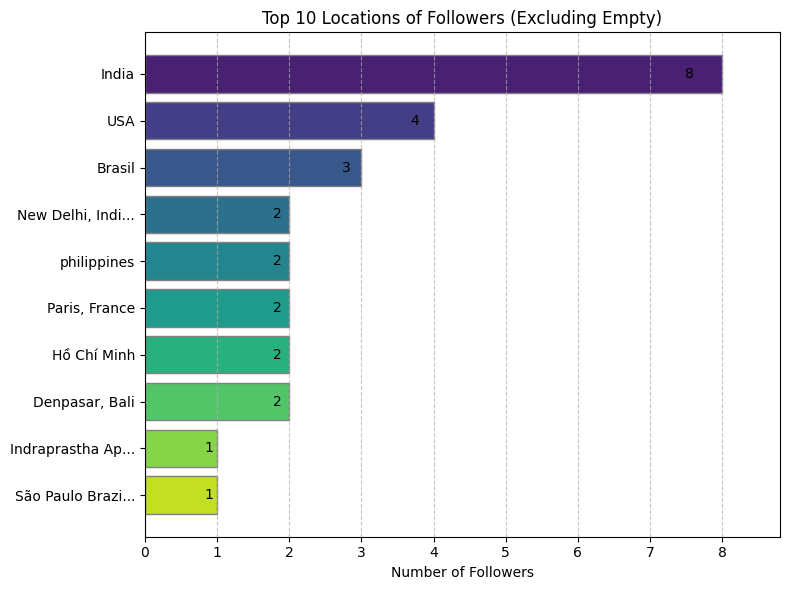

In [154]:
# Filter out empty or NaN values in the 'location' column and calculate the top 10 locations
top_locations = followers_df_copy['location'].dropna().replace('', pd.NA).dropna().value_counts().nlargest(10)

# Truncate location names to a maximum of 15 characters
def truncate_label(label, max_length=15):
    return label if len(label) <= max_length else label[:max_length] + "..."

labels = [truncate_label(loc) for loc in top_locations.index]
values = top_locations.values

palette = sns.color_palette("viridis", len(labels))

plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

plt.xlim(0, max(values) * 1.1)

for bar in bars:
    plt.text(bar.get_width() - (bar.get_width() * 0.05), 
             bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}',
             va='center', ha='right', fontsize=10, color='black')

plt.xlabel("Number of Followers")
plt.title("Top 10 Locations of Followers (Excluding Empty)")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()





After seeing where our followers are from, let's take a closer look at the articles they’ve written.

To keep the analysis focused on meaningful content, we're filtering out very short posts—those with a reading time of less than 1 minute. These super-short posts are often quick introductions like "Hi, this is my first article," which don’t give us much to work with.

Here’s what we did:
1. **Filtered Articles**: We kept only articles with a reading time longer than 1 minute.
2. **Updated Data**: We replaced each follower’s article data with this filtered list of longer posts.
3. **Recalculated Article Count**: We updated the article count based on these longer, more substantial posts.

With this cleaned-up dataset, we’re ready to dive into the details of followers’ more in-depth articles.


In [155]:
filtered_followers_df = followers_df_copy.copy()

def filter_articles(row):
    titles = row['article_titles']
    reading_times = row['article_reading_time_minutes']
    comments = row['article_comments_counts']
    reactions = row['article_positive_reactions_counts']
    
    # Apply the filter based on reading time > 1
    filtered_data = [
        (title, time, comment, reaction) 
        for title, time, comment, reaction in zip(titles, reading_times, comments, reactions) 
        if time > 1
    ]
    
    if filtered_data:
        titles, reading_times, comments, reactions = zip(*filtered_data)
    else:
        titles, reading_times, comments, reactions = [], [], [], []
    
    return pd.Series({
        'article_titles': list(titles),
        'article_reading_time_minutes': list(reading_times),
        'article_comments_counts': list(comments),
        'article_positive_reactions_counts': list(reactions)
    })


filtered_columns = filtered_followers_df.apply(filter_articles, axis=1)

filtered_followers_df[['article_titles', 'article_reading_time_minutes', 
                       'article_comments_counts', 'article_positive_reactions_counts']] = filtered_columns

filtered_followers_df['article_count'] = filtered_followers_df['article_titles'].apply(len)

# Now `filtered_followers_df` contains only articles with reading time > 1 minute



This scatter plot shows the distribution of followers based on the number of articles they've published, with outliers removed to focus on typical activity.

- Each point represents a specific number of articles and the corresponding number of followers who have published that many.
- We see that most followers have published a small number of articles, typically fewer than five.
- Only a few followers have more than 10 articles, suggesting that consistent, frequent publishing is relatively rare among followers.


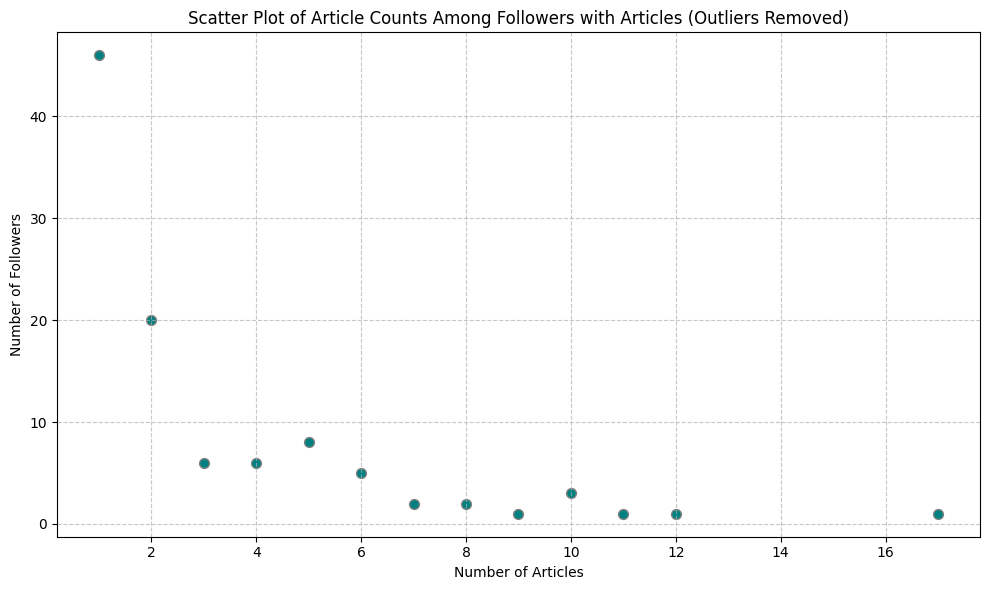

In [156]:
followers_with_articles = filtered_followers_df[filtered_followers_df['article_count'] > 0]

article_count_cutoff = np.percentile(followers_with_articles['article_count'].dropna(), 98)

followers_with_articles_filtered = followers_with_articles[followers_with_articles['article_count'] <= article_count_cutoff]

article_distribution = followers_with_articles_filtered['article_count'].value_counts().sort_index()

x = article_distribution.index  # Number of articles
y = article_distribution.values  # Number of followers with that article count

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="teal", edgecolor="gray", s=50, alpha=1)

plt.xlabel("Number of Articles")
plt.ylabel("Number of Followers")
plt.title("Scatter Plot of Article Counts Among Followers with Articles (Outliers Removed)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


This histogram shows the average article reading time for each follower who has published articles:

- Most followers have an average reading time between 2 and 5 minutes, indicating that their articles are relatively short.
- Only a few followers have an average reading time above 10 minutes, suggesting that longer articles are less common among followers.

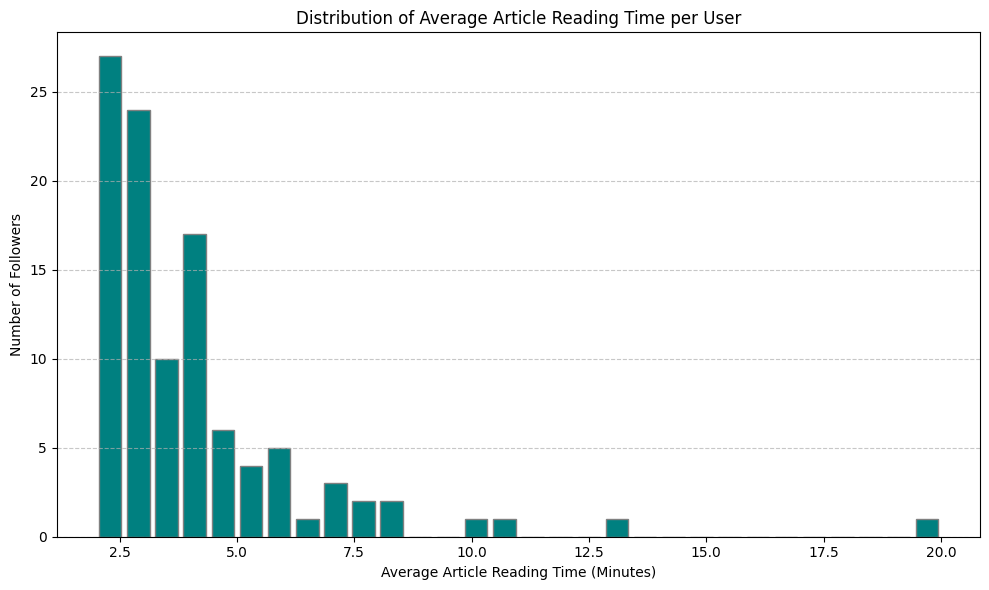

In [157]:
followers_with_articles = filtered_followers_df[filtered_followers_df['article_count'] > 0].copy()

# Calculate the average reading time per user
followers_with_articles['average_reading_time'] = followers_with_articles['article_reading_time_minutes'].apply(
    lambda x: sum(x) / len(x) if len(x) > 0 else 0
)

average_reading_times = followers_with_articles['average_reading_time']

plt.figure(figsize=(10, 6))
plt.hist(average_reading_times, bins=30, color="teal", edgecolor="gray", rwidth=0.8)

plt.xlabel("Average Article Reading Time (Minutes)")
plt.ylabel("Number of Followers")
plt.title("Distribution of Average Article Reading Time per User")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


This bar chart displays the most popular tags used in articles published by followers:

- **Top Tags**: The most common tags include "beginners," "webdev," and "programming," indicating that many followers focus on foundational topics and general programming skills.
- **Technical Topics**: Tags like "python," "javascript," "ai," and "devops" show a strong interest in specific programming languages, artificial intelligence, and software development practices.
- **Learning and Tutorials**: Tags such as "learning" and "tutorial" suggest that followers frequently write content aimed at teaching or sharing knowledge.


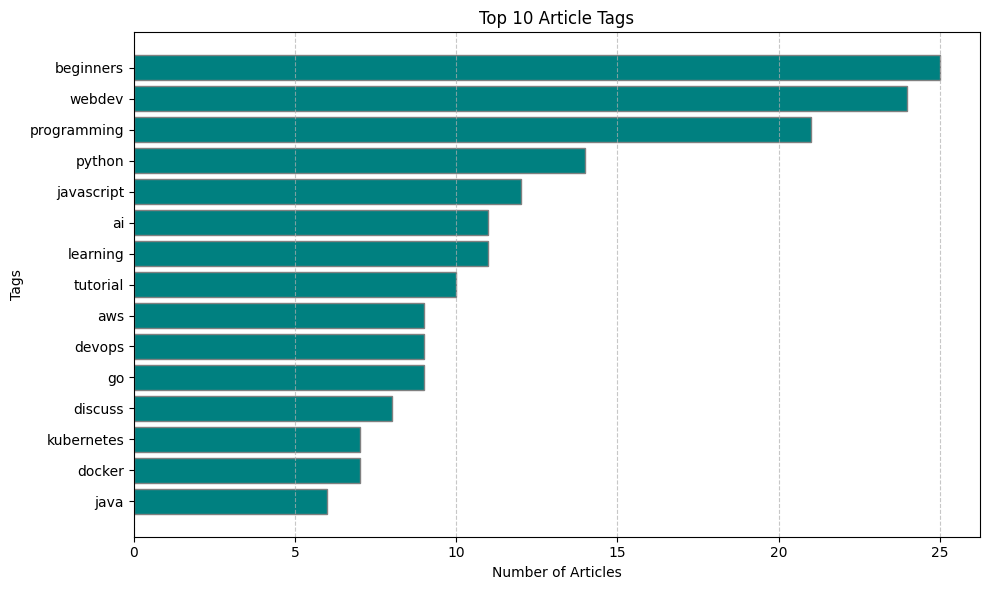

In [158]:
from collections import Counter

all_tags = [tag for tags_list in filtered_followers_df['unique_tags'] for tag in tags_list if pd.notnull(tag)]
tag_counts = Counter(all_tags)

top_tags = tag_counts.most_common(15)
tags, counts = zip(*top_tags)

plt.figure(figsize=(10, 6))
plt.barh(tags, counts, color="teal", edgecolor="gray")

plt.xlabel("Number of Articles")
plt.ylabel("Tags")
plt.title("Top 10 Article Tags")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


After examining the articles published by followers, let's turn our attention to followers who engage through comments rather than posting articles.

This chart shows the distribution of comment counts for followers who haven't published any articles:

- **Low Comment Activity**: The majority of these followers have made fewer than 5 comments, indicating minimal engagement through comments.
- **High Comment Outliers**: A small number of followers have a high comment count, with one reaching over 50 comments, which suggests more active participation through discussions.


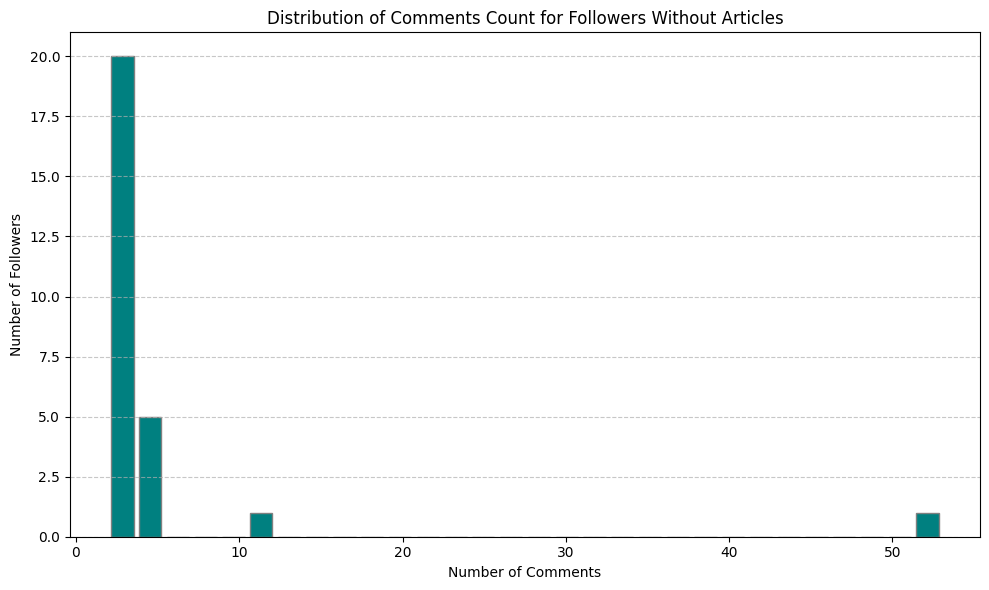

In [159]:
followers_with_only_comments = followers_df_copy[(followers_df_copy['comments_count'] > 0) & (followers_df_copy['article_count'] == 0)]

plt.figure(figsize=(10, 6))
plt.hist(followers_with_only_comments['comments_count'], bins=30, color="teal", edgecolor="gray", rwidth=0.8)

plt.xlabel("Number of Comments")
plt.ylabel("Number of Followers")
plt.title("Distribution of Comments Count for Followers Without Articles")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


After examining various aspects of follower engagement, such as article contributions, comments, and profile details, it’s useful to categorize followers based on their overall activity and profile completeness.

Here, we’ve grouped followers into four main categories:

1. **Active Contributors**: Followers who have published articles with a reading time over 1 minute or have engaged through comments.
2. **Connected Profiles**: Followers with external connections like a website, GitHub, or Twitter link but limited in other engagement.
3. **Basic Profiles**: Followers with minimal details, such as a location or a summary, but no articles or external connections.
4. **Empty Profiles**: Followers with no substantial profile information or activity.

The bar chart on the left shows the number of followers in each category, while the donut chart on the right provides a visual breakdown by percentage. This overall categorization gives us a clearer picture of the diversity within the follower base, highlighting the balance between active contributors and less engaged profiles.


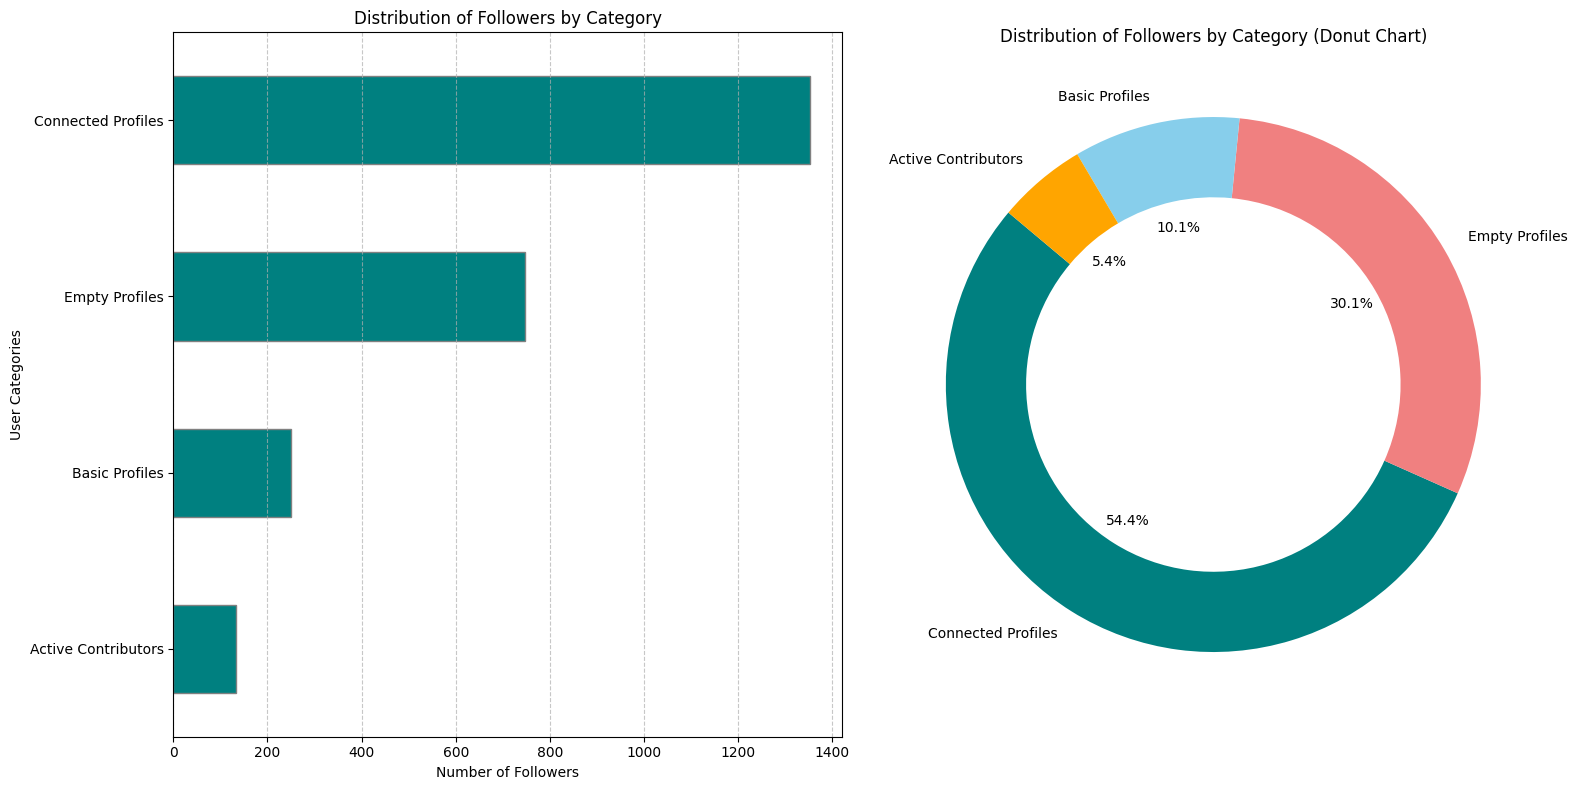

In [160]:
filtered_followers_df = followers_df_copy.copy()

def filter_articles(row):
    titles = row['article_titles']
    reading_times = row['article_reading_time_minutes']
    comments = row['article_comments_counts']
    reactions = row['article_positive_reactions_counts']
    
    # Apply the filter based on reading time > 1
    filtered_data = [
        (title, time, comment, reaction) 
        for title, time, comment, reaction in zip(titles, reading_times, comments, reactions) 
        if time > 1
    ]
    
    if filtered_data:
        titles, reading_times, comments, reactions = zip(*filtered_data)
    else:
        titles, reading_times, comments, reactions = [], [], [], []
    
    return pd.Series({
        'article_titles': list(titles),
        'article_reading_time_minutes': list(reading_times),
        'article_comments_counts': list(comments),
        'article_positive_reactions_counts': list(reactions)
    })


filtered_columns = filtered_followers_df.apply(filter_articles, axis=1)
filtered_followers_df[['article_titles', 'article_reading_time_minutes', 
                       'article_comments_counts', 'article_positive_reactions_counts']] = filtered_columns


filtered_followers_df['article_count'] = filtered_followers_df['article_titles'].apply(len)

# Define Categories
filtered_followers_df['category'] = 'Empty Profiles'  # Default category

# Active Contributors: Users with articles (with reading time > 1) or comments
filtered_followers_df.loc[(filtered_followers_df['article_count'] > 0) | 
                          (filtered_followers_df['comments_count'] > 0), 'category'] = 'Active Contributors'

# Connected Profiles: Users with external connections (website, GitHub, or Twitter)
filtered_followers_df.loc[(filtered_followers_df[['website_url', 'github_username', 'twitter_username']].notna().any(axis=1)) &
                          (filtered_followers_df['category'] == 'Empty Profiles'), 'category'] = 'Connected Profiles'

# Basic Profiles: Users with minimal signs (location or summary)
filtered_followers_df.loc[(filtered_followers_df[['location', 'summary']].notna().any(axis=1)) &
                          (filtered_followers_df['category'] == 'Empty Profiles'), 'category'] = 'Basic Profiles'

category_counts = filtered_followers_df['category'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


category_counts.plot(kind='barh', color="teal", edgecolor="gray", ax=ax1)
ax1.set_xlabel("Number of Followers")
ax1.set_ylabel("User Categories")
ax1.set_title("Distribution of Followers by Category")
ax1.invert_yaxis()
ax1.grid(axis='x', linestyle='--', alpha=0.7)


ax2.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'width': 0.3}, colors=["teal", "lightcoral", "skyblue", "orange"])
ax2.set_title("Distribution of Followers by Category (Donut Chart)")

plt.tight_layout()
plt.show()


To further understand our follower categories, we analyzed whether followers in each category joined Dev.to on the same day they started following, or if they were already part of the community.

This chart shows the breakdown:

- **Same Day Joiners**: Represented in light coral, these are followers who joined Dev.to on the same day they followed.
- **Other Joiners**: Shown in teal, these are followers who were already on Dev.to before they started following.

From this visualization, we can observe that **Empty and Basic Profiles** have a high proportion of same-day joiners, indicating that many followers with minimal or external-only profiles are new to the platform.


/var/folders/66/fl7_dzv10kddsf6t0v_7rb1c0000gn/T/ipykernel_49324/3353068315.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



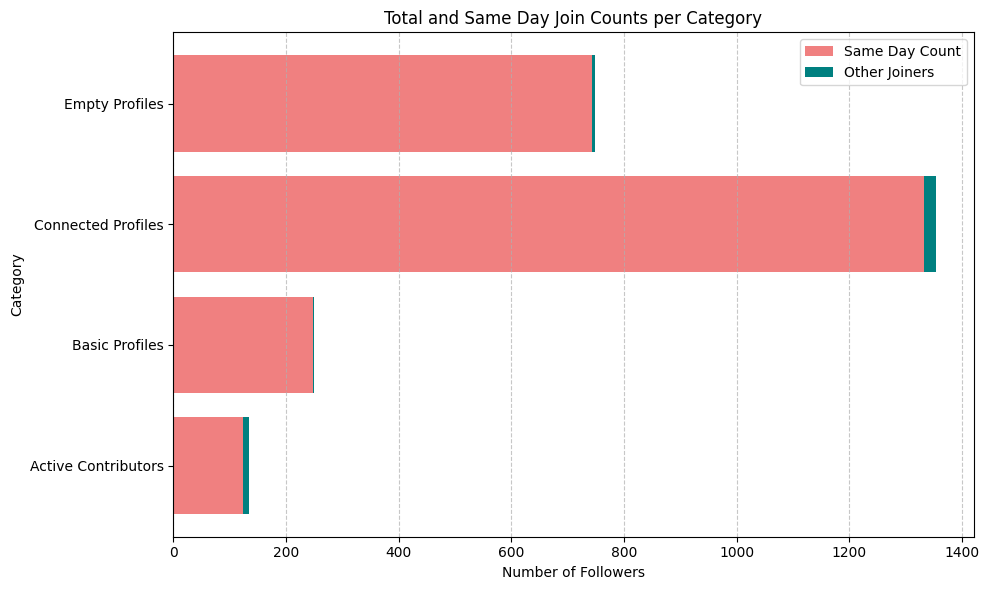

In [161]:
filtered_followers_df['joined_at'] = pd.to_datetime(filtered_followers_df['joined_at']).dt.date
filtered_followers_df['created_at'] = pd.to_datetime(filtered_followers_df['created_at']).dt.date

category_summary = filtered_followers_df.groupby('category').apply(
    lambda x: pd.Series({
        'total_count': x['created_at'].count(),
        'same_day_count': (x['created_at'] == x['joined_at']).sum()
    })
).reset_index()

category_summary['other_count'] = category_summary['total_count'] - category_summary['same_day_count']

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(category_summary['category'], category_summary['same_day_count'], color="lightcoral", label="Same Day Count")

ax.barh(category_summary['category'], category_summary['other_count'], left=category_summary['same_day_count'], color="teal", label="Other Joiners")

ax.set_xlabel("Number of Followers")
ax.set_ylabel("Category")
ax.set_title("Total and Same Day Join Counts per Category")
ax.legend()

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Building on our previous insights, let’s explore how different articles influenced new follower growth across each profile category. 

This chart shows the number of new followers from each category within 14 days of each article’s publication:

- **Article Influence**: Each bar represents an article and shows the distribution of new followers across the four categories: Active Contributors, Connected Profiles, Basic Profiles, and Empty Profiles.
- **Category Trends**: We can see that certain articles attracted onlye large numbers of Connected Profiles and Empty Profiles.
- **Highlights**: The article titled "My Journey Learning..." published on 2024-02-19 stands out, as it attracted a particularly high number of followers across all categories, especially in the Connected Profiles and Empty Profiles categories.

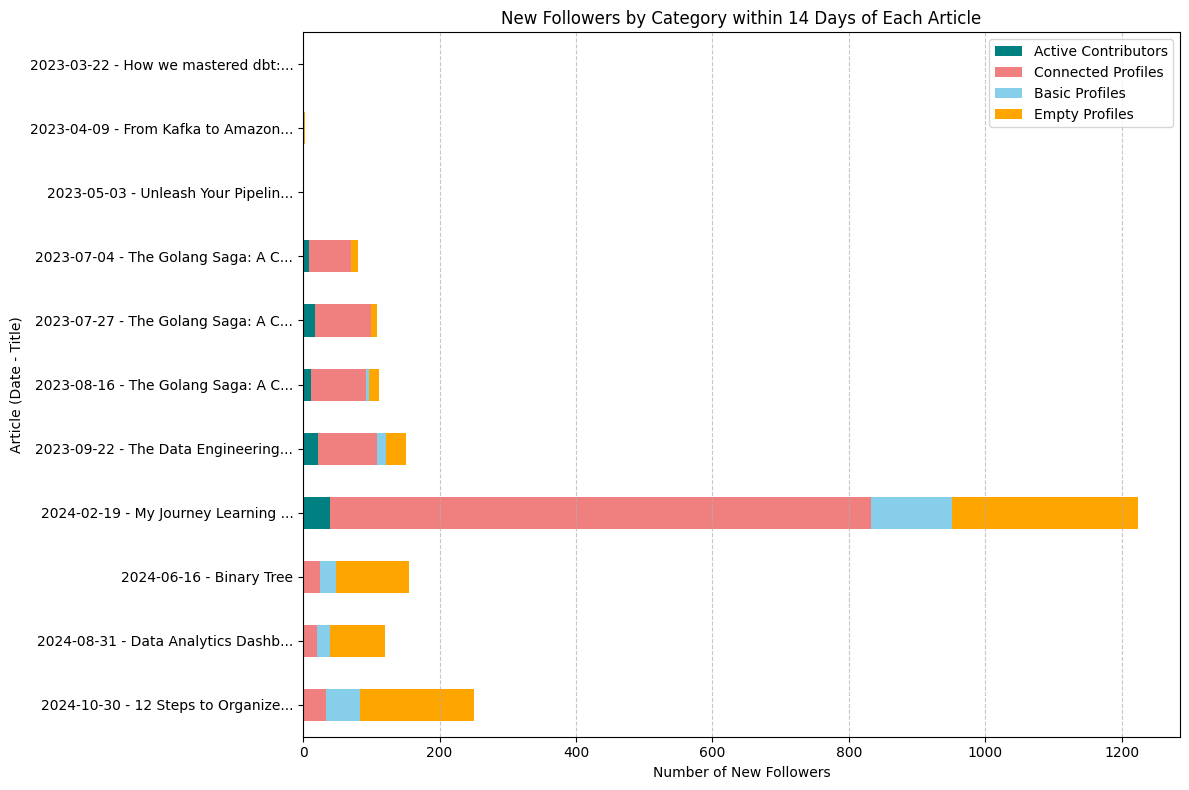

In [162]:
filtered_followers_df['joined_at'] = pd.to_datetime(filtered_followers_df['joined_at']).dt.date
articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at']).dt.date

# Set the duration window in days
duration = 14

category_counts_per_article = []

def shorten_title(title, max_length=20):
    return title if len(title) <= max_length else title[:max_length] + "..."


for article_date, article_title in zip(articles_df_copy['created_at'], articles_df_copy['title']):
    # Define the end date for the 14-day window
    end_date = article_date + pd.Timedelta(days=duration)
    
    # Filter followers who joined within this 14-day window
    new_followers = filtered_followers_df[
        (filtered_followers_df['joined_at'] >= article_date) & 
        (filtered_followers_df['joined_at'] <= end_date)
    ]
    
    # Count the number of followers in each category within this period
    category_counts = new_followers['category'].value_counts()
    
    # Append the article date, title, and category counts to the list
    category_counts_per_article.append({
        'article_label': f"{article_date} - {shorten_title(article_title)}",
        'Active Contributors': category_counts.get('Active Contributors', 0),
        'Connected Profiles': category_counts.get('Connected Profiles', 0),
        'Basic Profiles': category_counts.get('Basic Profiles', 0),
        'Empty Profiles': category_counts.get('Empty Profiles', 0)
    })

category_counts_df = pd.DataFrame(category_counts_per_article)

fig, ax = plt.subplots(figsize=(12, 8))

category_counts_df.set_index('article_label').plot(kind='barh', stacked=True, ax=ax,
    color=['teal', 'lightcoral', 'skyblue', 'orange'])

ax.set_xlabel("Number of New Followers")
ax.set_ylabel("Article (Date - Title)")
ax.set_title("New Followers by Category within 14 Days of Each Article")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


Looking at the stats for my articles, I noticed something odd. For instance, after publishing "My Journey Learning AI for Songwriting: LSTMs and Taylor Swift," I gained around 1,200 new followers in just 14 days, but according to the Dev.to dashboard, the article only has 342 views.

This mismatch is puzzling. In total, I have 2,485 followers and 6,214 views across all my articles. That would mean I’m converting a huge number of readers into followers, which seems unlikely. Plus, many of these followers joined Dev.to on the exact day they started following me.

**This makes me wonder if something unusual is going on—maybe there are issues with the view stats, or some of these followers might actually be bots**. 

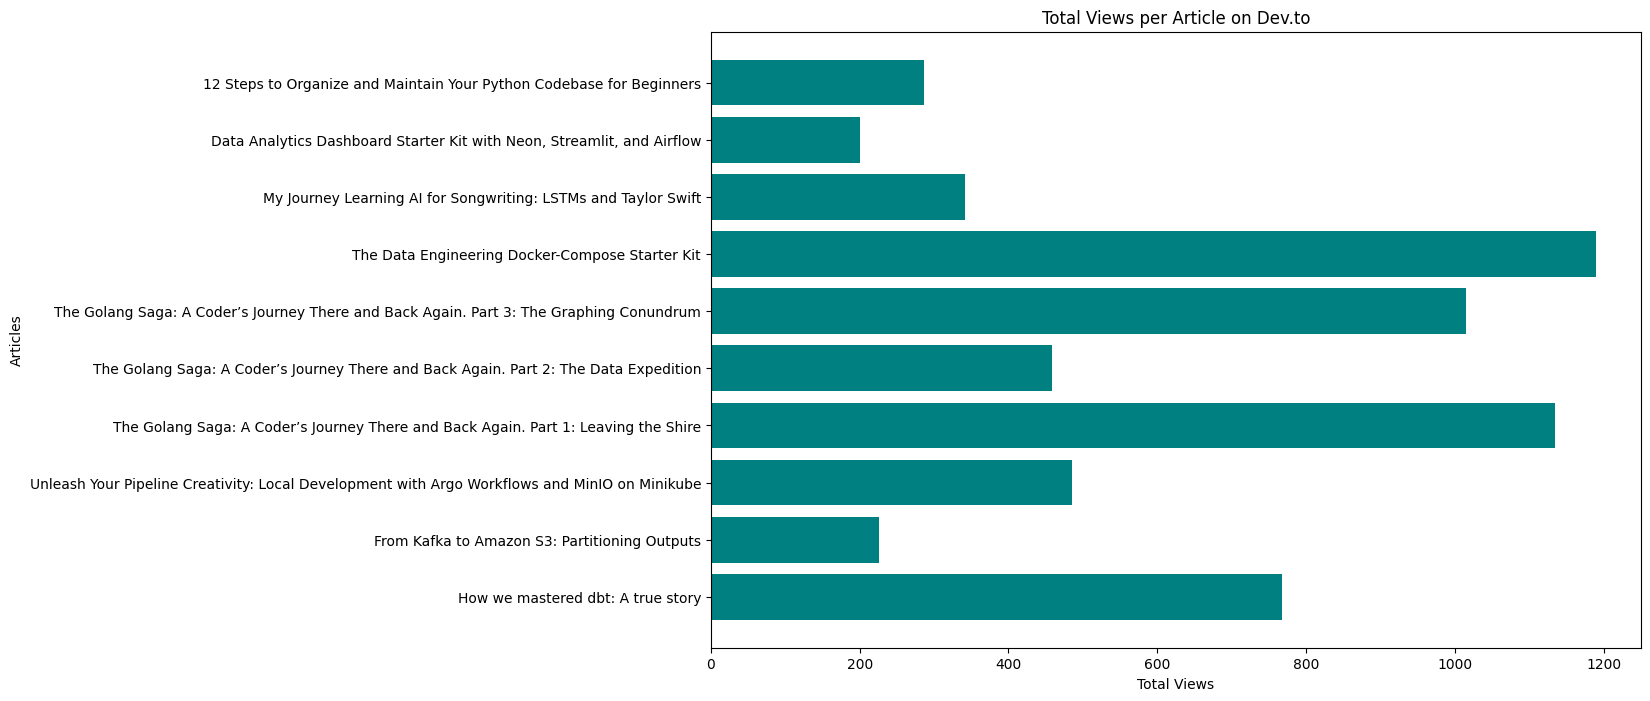

In [163]:
# Data for articles and views that I took from my dev.to Dashboard
articles = [
    "12 Steps to Organize and Maintain Your Python Codebase for Beginners",
    "Data Analytics Dashboard Starter Kit with Neon, Streamlit, and Airflow",
    "My Journey Learning AI for Songwriting: LSTMs and Taylor Swift",
    "The Data Engineering Docker-Compose Starter Kit",
    "The Golang Saga: A Coder’s Journey There and Back Again. Part 3: The Graphing Conundrum",
    "The Golang Saga: A Coder’s Journey There and Back Again. Part 2: The Data Expedition",
    "The Golang Saga: A Coder’s Journey There and Back Again. Part 1: Leaving the Shire",
    "Unleash Your Pipeline Creativity: Local Development with Argo Workflows and MinIO on Minikube",
    "From Kafka to Amazon S3: Partitioning Outputs",
    "How we mastered dbt: A true story"
]
views = [286, 201, 342, 1190, 1015, 458, 1134, 485, 226, 767]


plt.figure(figsize=(12, 8))
plt.barh(articles, views, color="teal")
plt.xlabel("Total Views")
plt.ylabel("Articles")
plt.title("Total Views per Article on Dev.to")
plt.gca().invert_yaxis() 

plt.show()


After noticing that the article "My Journey Learning..." attracted many followers in the "Connected Profiles" category—most of whom have GitHub accounts linked—I decided to take a closer look at these GitHub-connected followers. 

Here's how the code works:
1. **GitHub Access**: It sets up access to the GitHub API using a token, making sure we can pull information about these followers’ GitHub profiles.
2. **Loading or Fetching Data**: If we've already saved GitHub data in a file (`github_users.parquet`), it loads that file to save time. If not, it fetches the data directly from GitHub and saves it for future use.
3. **Previewing the Data**: Finally, it displays a sample of the GitHub-connected followers so we can start exploring their activity.

In [164]:
# Set up your GitHub token
GITHUB_TOKEN = os.getenv("GITHUB_TOKEN")
import src.github_client as github_client

# Check if the articles file exists
if os.path.exists("github_users.parquet"):
    # Load github users from the existing Parquet file
    github_users_df = pd.read_parquet("github_users.parquet")
    print("Loaded  github users  from github_users.parquet")
else:
    # Fetch  github users  and save to Parquet file
    github_users_df = github_client.update_with_github(filtered_followers_df)
    github_users_df.to_parquet("github_users.parquet", compression='gzip')
    print("Fetched  github users  from API and saved to github_users.parquet")

github_users_df.head(10)


Loaded  github users  from articles.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,...,article_comments_counts,article_positive_reactions_counts,badges,badge_descriptions,comments_count,tags_count,category,github_created_at,github_updated_at,github_public_repos
0,user_follower,58265923,2024-10-31,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,...,[],[],[],[],0,0,Connected Profiles,2022-12-08T14:15:10Z,2024-10-31T20:30:56Z,42.0
10,user_follower,58218481,2024-10-31,2314021,MaikerAG,/maikerag,maikerag,"https://media2.dev.to/dynamic/image/width=320,...",None,MaikerAG,...,[],[],[],[],0,4,Connected Profiles,2019-06-07T17:23:04Z,2021-08-04T21:29:20Z,0.0
20,user_follower,58213793,2024-10-31,2313760,zhci,/zhci,zhci,"https://media2.dev.to/dynamic/image/width=320,...",None,zhci,...,[],[],[],[],0,2,Connected Profiles,2023-03-28T10:27:36Z,2024-05-24T01:31:23Z,0.0
45,user_follower,58202877,2024-10-31,2313013,Trisna Wahyudi,/trisnawyd,trisnawyd,"https://media2.dev.to/dynamic/image/width=320,...",None,trisnawyd,...,[],[],[],[],0,3,Connected Profiles,2024-08-05T02:31:34Z,2024-10-31T08:33:15Z,2.0
50,user_follower,58201931,2024-10-31,2312936,KKK,/kkkbot,kkkbot,"https://media2.dev.to/dynamic/image/width=320,...",None,kkk-bot,...,[],[],[],[],0,3,Connected Profiles,2020-11-03T15:19:17Z,2024-10-06T12:05:50Z,5.0
65,user_follower,58197068,2024-10-31,2312612,Fahaam Tashfeen,/fahaamtashfeen,fahaamtashfeen,"https://media2.dev.to/dynamic/image/width=320,...",None,fahaamtashfeen,...,[],[],[],[],0,4,Connected Profiles,2023-11-15T19:44:54Z,2024-10-30T21:14:14Z,2.0
74,user_follower,58194772,2024-10-31,2312450,Sibusiso Ntuli,/codiex0,codiex0,"https://media2.dev.to/dynamic/image/width=320,...",None,CODIEX0,...,[],[],[],[],0,31,Connected Profiles,2022-06-12T16:46:57Z,2024-10-31T05:53:14Z,19.0
87,user_follower,58191216,2024-10-31,2312170,Gilbard Yizreel,/ixchel_65,ixchel_65,"https://media2.dev.to/dynamic/image/width=320,...",None,ix-chel,...,[],[],[],[],0,5,Connected Profiles,2023-02-20T15:01:25Z,2024-10-24T12:46:24Z,9.0
94,user_follower,58189484,2024-10-31,2312037,deepu4uforall,/deepu4uforall,deepu4uforall,"https://media2.dev.to/dynamic/image/width=320,...",None,deepu4uforall,...,[],[],[],[],0,11,Connected Profiles,2024-02-03T05:06:34Z,2024-10-31T04:20:37Z,3.0
112,user_follower,58185556,2024-10-31,2311710,Maulana Yusuf Al Ghani,/4lphards,4lphards,"https://media2.dev.to/dynamic/image/width=320,...",None,4lphards,...,[],[],[],[],0,14,Connected Profiles,2022-10-24T09:47:19Z,2024-11-01T13:25:01Z,5.0


In [165]:
github_users_copy_df = github_users_df.copy()
github_users_copy_df['github_created_at'] = pd.to_datetime(github_users_copy_df['github_created_at']).dt.date
github_users_copy_df['github_updated_at'] = pd.to_datetime(github_users_copy_df['github_updated_at']).dt.date

To understand more about these GitHub-connected followers, I looked into a few specific details about their profiles:

1. **Same Join and Creation Date with No Activity**: I found that 8 followers joined Dev.to on the same day their GitHub account was created and last updated, and they have no public repositories.

2. **Same Join and GitHub Creation Date**: 19 followers joined Dev.to on the same day their GitHub accounts were created, regardless of their last update date.

3. **Followers with No Public Repos**: A total of 110 followers in this Connected Profiles group have zero public repositories, which could indicate minimal GitHub activity or that they primarily use private repositories.


In [166]:
same_join_created_updated_zero_repos = github_users_copy_df[
    (github_users_copy_df['joined_at'] == github_users_copy_df['github_created_at']) & 
    (github_users_copy_df['joined_at'] == github_users_copy_df['github_updated_at']) & 
    (github_users_copy_df['github_public_repos'] == 0)
].shape[0]

same_join_created = github_users_copy_df[
    (github_users_copy_df['joined_at'] == github_users_copy_df['github_created_at']) 
].shape[0]

zero_repos_count = github_users_copy_df[github_users_copy_df['github_public_repos'] == 0].shape[0]

print(f"Followers where joined_at == github_created_at and joined_at == github_updated_at with 0 repos: {same_join_created_updated_zero_repos}")
print(f"Followers where joined_at == github_created_at: {same_join_created}")
print(f"Total followers with 0 public repos: {zero_repos_count}")


Followers where joined_at == github_created_at and joined_at == github_updated_at with 0 repos: 8
Followers where joined_at == github_created_at: 19
Total followers with 0 public repos: 110


After identifying a large number of Connected Profiles among my followers, I wanted to dig deeper into their GitHub activity status to see how many are actively using GitHub versus those who may not be as engaged.

In this analysis:

1. **Active**: Followers with GitHub profiles showing consistent activity (more than 2 public repositories and recent updates after account creation).
2. **Non-Active**: Followers with GitHub profiles but without signs of public regular activity (either minimal repositories or no recent updates).
3. **None**: Followers whose GitHub profiles couldn’t be found or linked properly.

The bar chart and donut chart above illustrate this breakdown:
- The majority of GitHub-connected followers are classified as **Active**, suggesting a high level of engagement.
- A smaller portion falls under **Non-Active**, indicating they have GitHub accounts but may not be actively contributing or have public repos.
- A minimal group is labeled as **None**, meaning their GitHub profiles were either missing or not found.


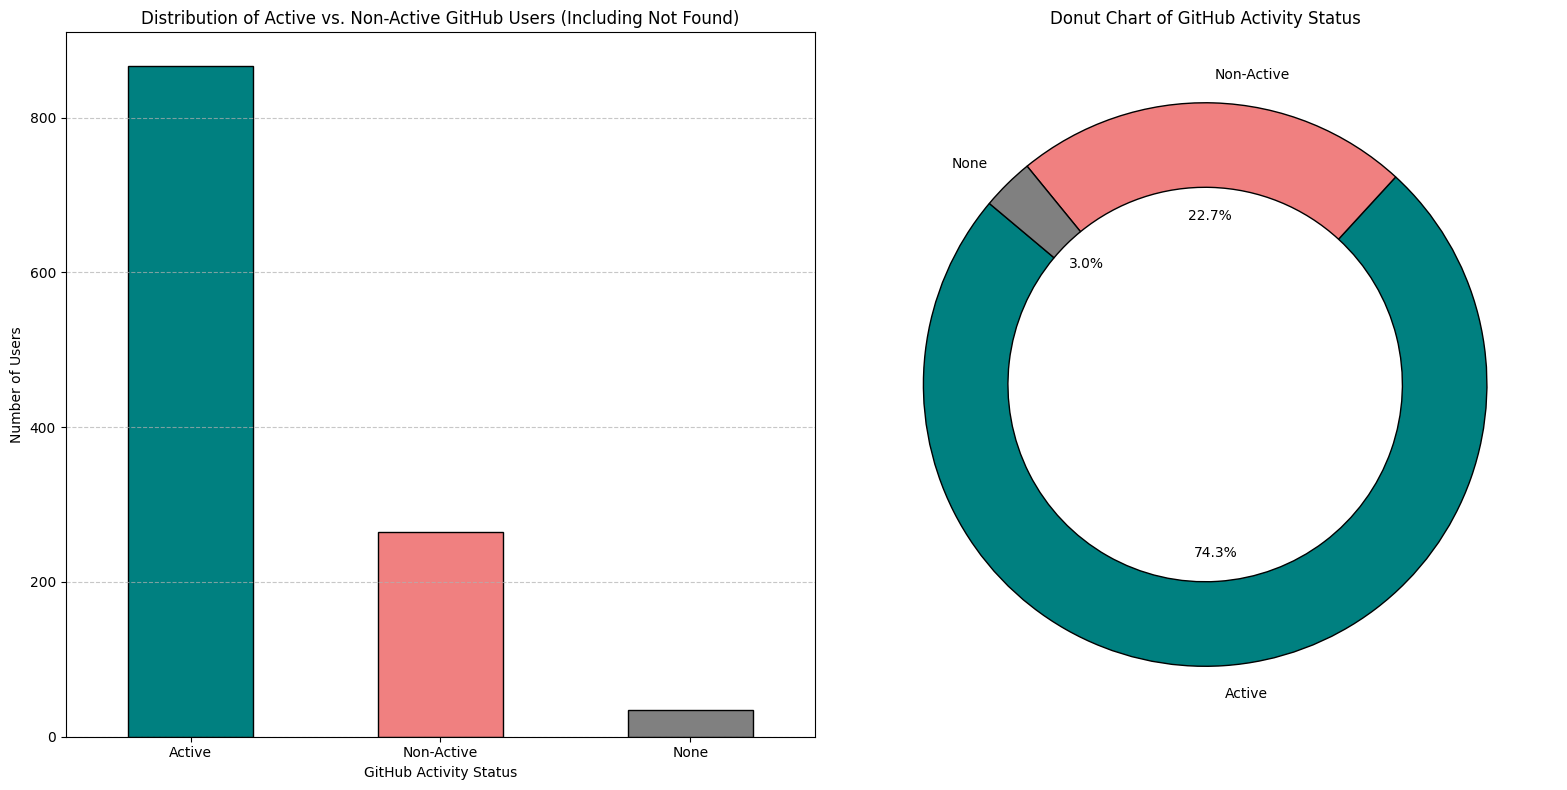

In [167]:
github_users_copy_df['github_activity_status'] = github_users_copy_df.apply(
    lambda x: 'Active' if (pd.notna(x['github_public_repos']) and x['github_created_at'] != x['github_updated_at'] and x['github_public_repos'] > 2) 
              else 'Non-Active' if pd.notna(x['github_public_repos']) 
              else 'None',
    axis=1
)

activity_counts = github_users_copy_df['github_activity_status'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

activity_counts.plot(kind='bar', color=["teal", "lightcoral", "gray"], edgecolor="black", ax=ax1)
ax1.set_xlabel("GitHub Activity Status")
ax1.set_ylabel("Number of Users")
ax1.set_title("Distribution of Active vs. Non-Active GitHub Users (Including Not Found)")
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticklabels(activity_counts.index, rotation=0)

ax2.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=["teal", "lightcoral", "gray"], wedgeprops={'width': 0.3, 'edgecolor': 'black'})
ax2.set_title("Donut Chart of GitHub Activity Status")

plt.tight_layout()
plt.show()


To understand the distribution of GitHub activity among my followers, I focused on the number of public repositories they have. Since a few users had extremely high repository counts, I applied a cutoff at the 98th percentile to filter out these outliers for a more meaningful view of the general trend.

This scatter plot shows the distribution of public repository counts across users, with the majority having fewer repositories. This suggests that while some followers are highly active on GitHub with numerous repositories, the typical follower has a more modest count, aligning with general user trends.

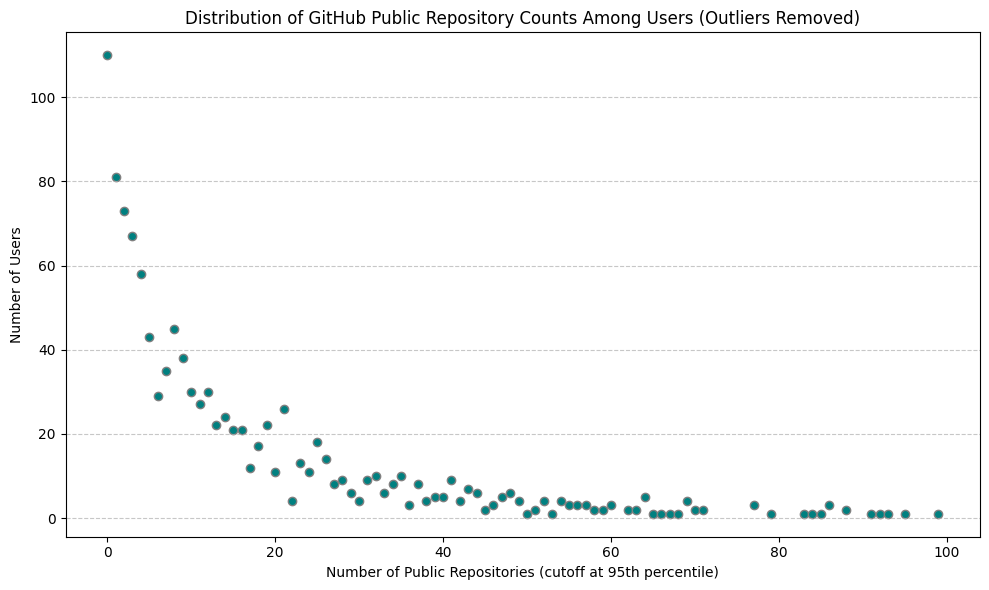

In [168]:
cleaned_repo_counts = github_users_copy_df['github_public_repos'].dropna()
cutoff = np.percentile(cleaned_repo_counts, 98)

filtered_repo_counts = cleaned_repo_counts[cleaned_repo_counts <= cutoff].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(filtered_repo_counts.index, filtered_repo_counts.values, color="teal", edgecolor="gray", alpha=1)

plt.xlabel("Number of Public Repositories (cutoff at 95th percentile)")
plt.ylabel("Number of Users")
plt.title("Distribution of GitHub Public Repository Counts Among Users (Outliers Removed)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
